In [537]:
import pandas as pd
import yfinance as yf
from datetime import date, datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [538]:
start_date = '2021-1-1'
end_date = '2024-1-1'
print("Start Date:",start_date," End Date:",end_date)

Start Date: 2021-1-1  End Date: 2024-1-1


In [539]:
import yfinance as yf
import pandas as pd

# # Download stock data for ZOMATO.NS
df = yf.download('ZOMATO.NS', start='2021-01-01', end='2024-12-17')

# # Reset the index to create a 'Date' column
df.reset_index(inplace=True)

# # Display the first few rows of the DataFrame
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price        Date   Adj Close       Close        High         Low        Open  \
Ticker              ZOMATO.NS   ZOMATO.NS   ZOMATO.NS   ZOMATO.NS   ZOMATO.NS   
0      2021-07-23  126.000000  126.000000  138.899994  115.000000  116.000000   
1      2021-07-26  140.649994  140.649994  143.750000  125.300003  126.349998   
2      2021-07-27  132.899994  132.899994  147.800003  127.750000  141.699997   
3      2021-07-28  131.199997  131.199997  135.000000  123.550003  131.000000   
4      2021-07-29  141.550003  141.550003  144.000000  132.199997  134.949997   

Price      Volume  
Ticker  ZOMATO.NS  
0       694895290  
1       249723854  
2       240341900  
3       159793731  
4       117973089  


In [540]:
ticker = 'ZOMATO.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089
...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 604 entries, 2021-07-23 to 2023-12-29
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   (Adj Close, ZOMATO.NS)  604 non-null    float64
 1   (Close, ZOMATO.NS)      604 non-null    float64
 2   (High, ZOMATO.NS)       604 non-null    float64
 3   (Low, ZOMATO.NS)        604 non-null    float64
 4   (Open, ZOMATO.NS)       604 non-null    float64
 5   (Volume, ZOMATO.NS)     604 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 33.0 KB


In [542]:
df.isnull().sum()

Price      Ticker   
Adj Close  ZOMATO.NS    0
Close      ZOMATO.NS    0
High       ZOMATO.NS    0
Low        ZOMATO.NS    0
Open       ZOMATO.NS    0
Volume     ZOMATO.NS    0
dtype: int64

In [543]:
df.duplicated().sum()

0

<Axes: xlabel='Date'>

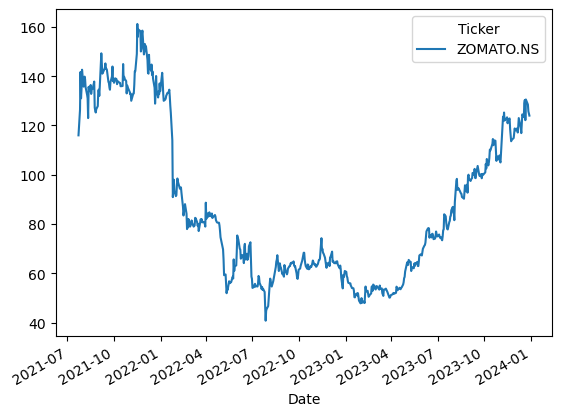

In [544]:
df['Open'].plot()

<Axes: xlabel='Date'>

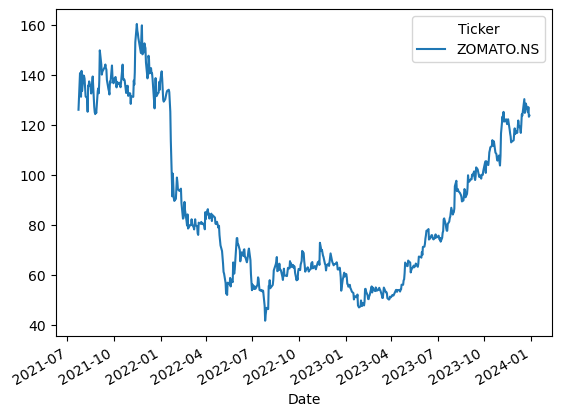

In [545]:
df['Close'].plot()

In [546]:
df['Close Rolling 10'] = df['Close'].rolling(window=10,min_periods=1).mean()
df.head(14)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,
Date,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998
2021-07-30,133.500000,133.500000,142.699997,131.000000,142.600006,88312522,134.299998
2021-08-02,139.699997,139.699997,140.750000,135.149994,135.750000,66909732,135.071426
2021-08-03,139.399994,139.399994,140.800003,137.000000,137.000000,46610001,135.612497


<Axes: xlabel='Date'>

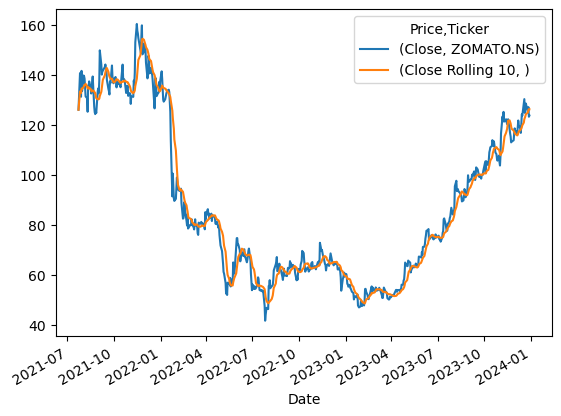

In [547]:
df[['Close','Close Rolling 10']].plot()

In [548]:
df['Close Rolling 30'] = df['Close'].rolling(window=30,min_periods=1).mean()

In [549]:
df['Close Rolling 50'] = df['Close'].rolling(window=50,min_periods=1).mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,
Date,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800,124.235000,120.270000,116.821000
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782,124.890000,120.375000,117.141000


<Axes: xlabel='Date'>

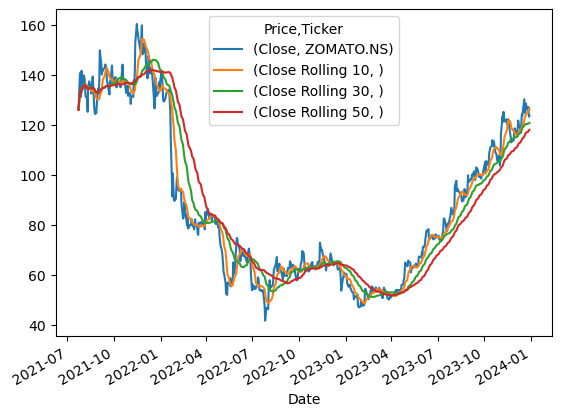

In [550]:
df[['Close','Close Rolling 10','Close Rolling 30','Close Rolling 50']].plot()

In [551]:
#cummulative MOving average
df['CMA']=df['Close'].expanding().mean()
df

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,
Date,,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000,126.000000
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997,133.324997
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329,133.183329
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496,132.687496
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998,134.459998
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,128.500000,128.500000,131.000000,125.300003,130.550003,63113800,124.235000,120.270000,116.821000,87.436833
2023-12-26,125.000000,125.000000,128.699997,124.300003,128.500000,25499782,124.890000,120.375000,117.141000,87.499334


<Axes: xlabel='Date'>

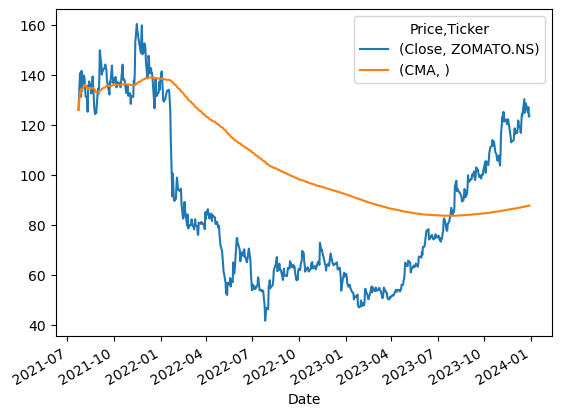

In [552]:
df[['Close','CMA']].plot()

In [553]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [554]:
adf_test(df['Close'])

ADF Statistics: -1.2397218927651101
p- value: 0.6562793202598429
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [555]:
df['First Difference'] = df['Close']-df['Close'].shift(1)
df.head()

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,
Date,,,,,,,,,,,
2021-07-23,126.000000,126.000000,138.899994,115.000000,116.000000,694895290,126.000000,126.000000,126.000000,126.000000,NaN
2021-07-26,140.649994,140.649994,143.750000,125.300003,126.349998,249723854,133.324997,133.324997,133.324997,133.324997,14.649994
2021-07-27,132.899994,132.899994,147.800003,127.750000,141.699997,240341900,133.183329,133.183329,133.183329,133.183329,-7.750000
2021-07-28,131.199997,131.199997,135.000000,123.550003,131.000000,159793731,132.687496,132.687496,132.687496,132.687496,-1.699997
2021-07-29,141.550003,141.550003,144.000000,132.199997,134.949997,117973089,134.459998,134.459998,134.459998,134.459998,10.350006


In [556]:
adf_test(df['First Difference'].dropna())

ADF Statistics: -25.745020325304232
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

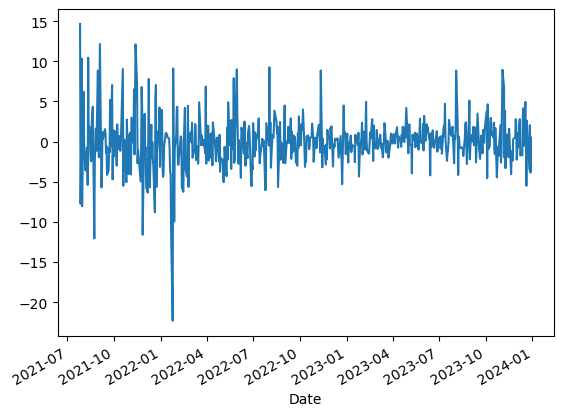

In [557]:
df['First Difference'].dropna().plot()

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


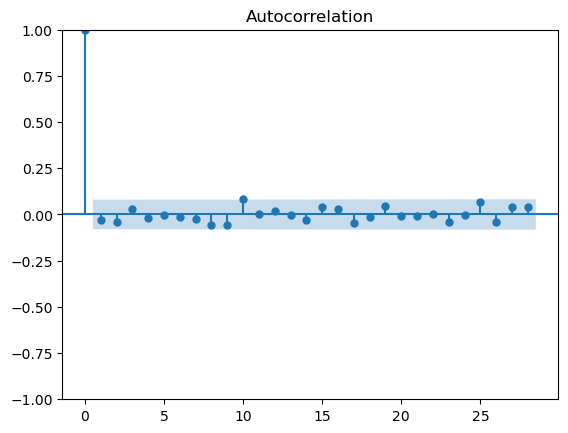

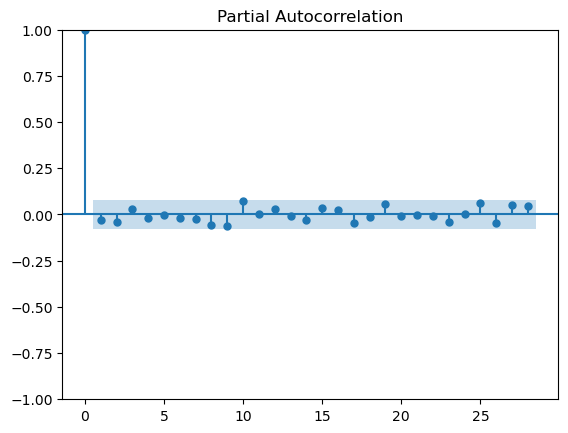

In [558]:
acf = plot_acf(df["First Difference"].dropna())
pacf = plot_pacf(df["First Difference"].dropna())

In [559]:
step = auto_arima(df['First Difference'].dropna(),trace=True,suppress_warnings=True)
step.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=3095.233, Time=0.60 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=3089.015, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3090.408, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3090.356, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3087.015, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3091.636, Time=0.29 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 1.088 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  603
Model:                        SARIMAX   Log Likelihood               -1542.508
Date:                Thu, 19 Dec 2024   AIC                           3087.015
Time:                        20:14:23   BIC                           3091.417
Sample:                             0   HQIC                          3088.729
                                - 603                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.7594      0.268     36.454      0.000       9.235      10.284
===================================================================================
Ljung-Box (L1) (Q):                   0.59   Jarque-Bera (JB):              1169.81
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [560]:
model_ARIMA=ARIMA(df['Close'],order=(15,2,3))
model_ARIMA_fit = model_ARIMA.fit()

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

In [561]:
model_ARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              ZOMATO.NS   No. Observations:                  604
Model:                ARIMA(15, 2, 3)   Log Likelihood               -1532.243
Date:                Thu, 19 Dec 2024   AIC                           3102.485
Time:                        20:14:26   BIC                           3186.090
Sample:                             0   HQIC                          3135.026
                                - 604                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6896      0.049    -14.181      0.000      -0.785      -0.594
ar.L2         -0.9797      0.056    -17.528      0.000      -1.089      -0.870
ar.L3         -0.0256      0.046     -0.561      0.575      -0.115       0.064
ar.L4         -0.0365      0.052     -0.706      0.480      -0.138       0.065
ar.L5          0.0117      0.065      0.181      0.857      -0.116       0.139
ar.L6         -0.0361      0.061     -0.589      0.556      -0.156       0.084
ar.L7         -0.0299      0.066     -0.457      0.648      -0.158       0.098
ar.L8         -0.0934      0.061     -1.529      0.126      -0.213       0.026
ar.L9         -0.1229      0.064     -1.934      0.053      -0.247       0.002
ar.L10         0.0072      0.058      0.124      0.901      -0.107       0.121
ar.L11         0.0024      0.065      0.037      0.971      -0.125       0.130
ar.L12         0.1242      0.064      1.933      0.053      -0.002       0.250
ar.L13         0.0176      0.068      0.258      0.797      -0.116       0.151
ar.L14         0.0076      0.051      0.150      0.881      -0.092       0.107
ar.L15         0.0437      0.041      1.055      0.291      -0.038       0.125
ma.L1         -0.3305      0.048     -6.927      0.000      -0.424      -0.237
ma.L2          0.2584      0.047      5.535      0.000       0.167       0.350
ma.L3         -0.9256      0.047    -19.774      0.000      -1.017      -0.834
sigma2         9.1894      0.370     24.817      0.000       8.464       9.915
===================================================================================
Ljung-Box (L1) (Q):                   0.40   Jarque-Bera (JB):               961.87
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               0.26   Skew:                            -0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [562]:
df1 = yf.download(ticker,start='2024-12-1',end=date.today())
df1

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS
Date,,,,,,
2024-12-02,282.500000,282.500000,285.700012,280.450012,281.899994,35170688
2024-12-03,279.850006,279.850006,282.350006,279.000000,279.700012,30078648
2024-12-04,286.250000,286.250000,288.000000,283.000000,283.000000,45520598
2024-12-05,299.350006,299.350006,304.649994,286.850006,288.250000,102148528
2024-12-06,302.950012,302.950012,303.899994,296.250000,300.000000,49309068
2024-12-09,295.299988,295.299988,304.700012,291.799988,304.700012,51131895
2024-12-10,295.850006,295.850006,299.450012,295.000000,296.750000,31333039
2024-12-11,291.799988,291.799988,294.299988,288.600006,290.000000,39053928


In [563]:
pred_arima=model_ARIMA_fit.predict(start=datetime(2023,12,8),end=datetime(2023,12,29))
residuals=df['Close']-pred_arima

#df.head()

#df.tail()

In [564]:
df.tail(15)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,
Date,,,,,,,,,,,
2023-12-08,119.949997,119.949997,123.900002,119.300003,123.000000,44213196,117.320000,116.271667,112.520,86.813136,-1.750000
2023-12-11,118.449997,118.449997,120.500000,117.550003,119.949997,32372287,117.840000,116.671667,112.891,86.866667,-1.500000
2023-12-12,116.750000,116.750000,119.300003,114.150002,119.000000,40800538,118.135000,117.041667,113.224,86.917145,-1.699997
2023-12-13,120.000000,120.000000,120.500000,116.150002,116.900002,48092329,118.475000,117.451667,113.625,86.972934,3.250000
2023-12-14,124.150002,124.150002,124.949997,120.500000,121.000000,74178495,119.035000,118.086667,114.078,87.035522,4.150002
2023-12-15,123.599998,123.599998,125.000000,122.400002,124.500000,39542770,119.764999,118.750000,114.444,87.096975,-0.550003
2023-12-18,128.550003,128.550003,129.199997,121.550003,123.400002,89553155,120.880000,119.450000,115.000,87.166527,4.950005
2023-12-19,130.250000,130.250000,131.750000,127.400002,129.000000,64117314,122.230000,119.908334,115.497,87.238693,1.699997


<Axes: xlabel='Date'>

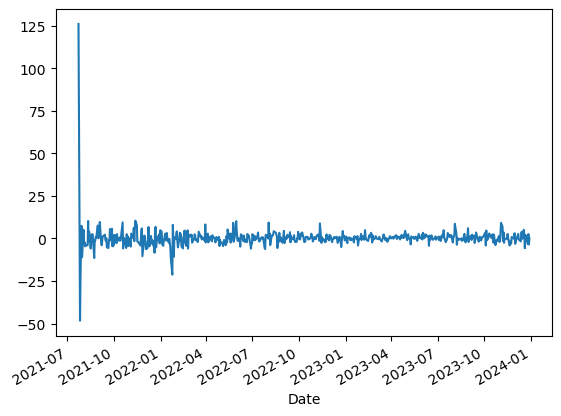

In [565]:
model_ARIMA_fit.resid.plot()

<Axes: ylabel='Density'>

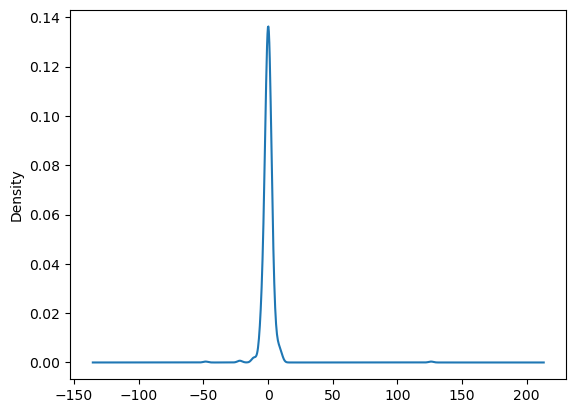

In [566]:
model_ARIMA_fit.resid.plot(kind='kde')

In [567]:
df['Predicted_ARIMA']=pred_arima

In [568]:
df.tail(15)

Price,Adj Close,Close,High,Low,Open,Volume,Close Rolling 10,Close Rolling 30,Close Rolling 50,CMA,First Difference,Predicted_ARIMA
Ticker,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,ZOMATO.NS,,,,,,
Date,,,,,,,,,,,,
2023-12-08,119.949997,119.949997,123.900002,119.300003,123.000000,44213196,117.320000,116.271667,112.520,86.813136,-1.750000,120.551258
2023-12-11,118.449997,118.449997,120.500000,117.550003,119.949997,32372287,117.840000,116.671667,112.891,86.866667,-1.500000,119.919499
2023-12-12,116.750000,116.750000,119.300003,114.150002,119.000000,40800538,118.135000,117.041667,113.224,86.917145,-1.699997,118.497384
2023-12-13,120.000000,120.000000,120.500000,116.150002,116.900002,48092329,118.475000,117.451667,113.625,86.972934,3.250000,116.713744
2023-12-14,124.150002,124.150002,124.949997,120.500000,121.000000,74178495,119.035000,118.086667,114.078,87.035522,4.150002,120.264997
2023-12-15,123.599998,123.599998,125.000000,122.400002,124.500000,39542770,119.764999,118.750000,114.444,87.096975,-0.550003,123.825083
2023-12-18,128.550003,128.550003,129.199997,121.550003,123.400002,89553155,120.880000,119.450000,115.000,87.166527,4.950005,123.498997
2023-12-19,130.250000,130.250000,131.750000,127.400002,129.000000,64117314,122.230000,119.908334,115.497,87.238693,1.699997,127.999510


In [569]:
df['Predicted_ARIMA']=pred_arima
print(df['Predicted_ARIMA'].dropna())

Date
2023-12-08    120.551258
2023-12-11    119.919499
2023-12-12    118.497384
2023-12-13    116.713744
2023-12-14    120.264997
2023-12-15    123.825083
2023-12-18    123.498997
2023-12-19    127.999510
2023-12-20    130.518611
2023-12-21    125.400495
2023-12-22    126.962517
2023-12-26    128.373108
2023-12-27    124.491077
2023-12-28    126.742053
2023-12-29    123.610638
Name: Predicted_ARIMA, dtype: float64


<Axes: xlabel='Date'>

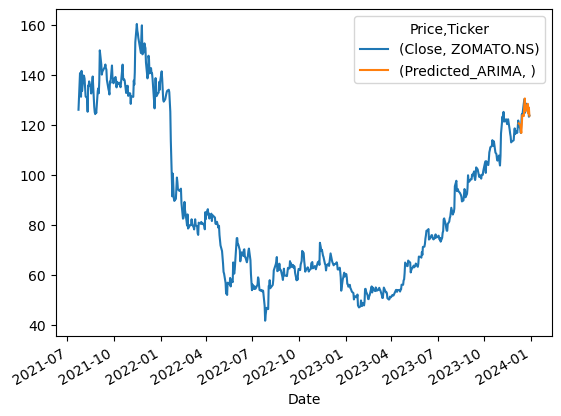

In [570]:
df[['Close','Predicted_ARIMA']].plot()

c:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


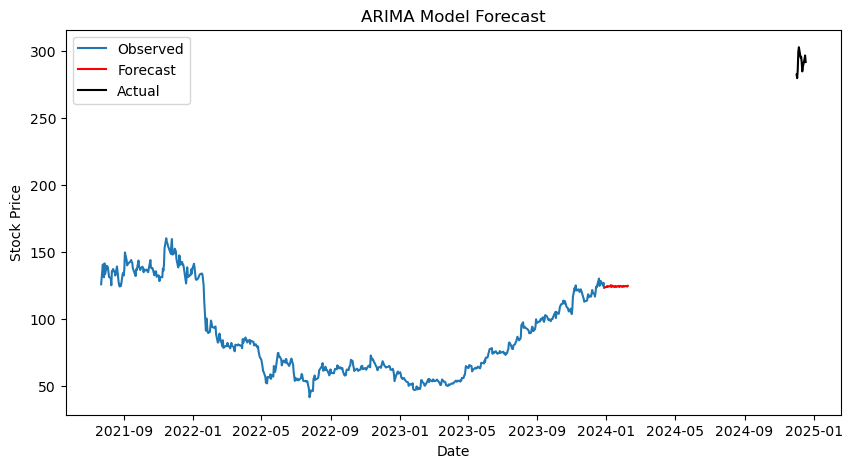

In [571]:
forecast_steps = 30
forecast = model_ARIMA_fit.forecast(steps=forecast_steps)

# Create a forecasted index (next 30 days)
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=0), periods=forecast_steps, freq='B')

# Step 6: Visualize the results
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Observed')

plt.plot(forecast_index, forecast, label='Forecast', color='red')
plt.plot(df1['Close'],label='Actual',color='Black')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [572]:
###forecat_res = pd.DataFrame({'Date':df1['Date'],})
# # Check the columns of df1
# print(df1.columns)

# # Assuming the correct column name is 'date' (lowercase) or something else, adjust accordingly
# # Create the DataFrame with the correct column name
# forecat_res = pd.DataFrame({'Date': df1['date']})  # Replace 'date' with the actual column name if different
 

Mean Absolute Error: 2.49
Root Mean Squared Error: 2.97
R-squared Score: 0.3963
Model Accuracy: 98.00%
Directional Accuracy: 35.71%


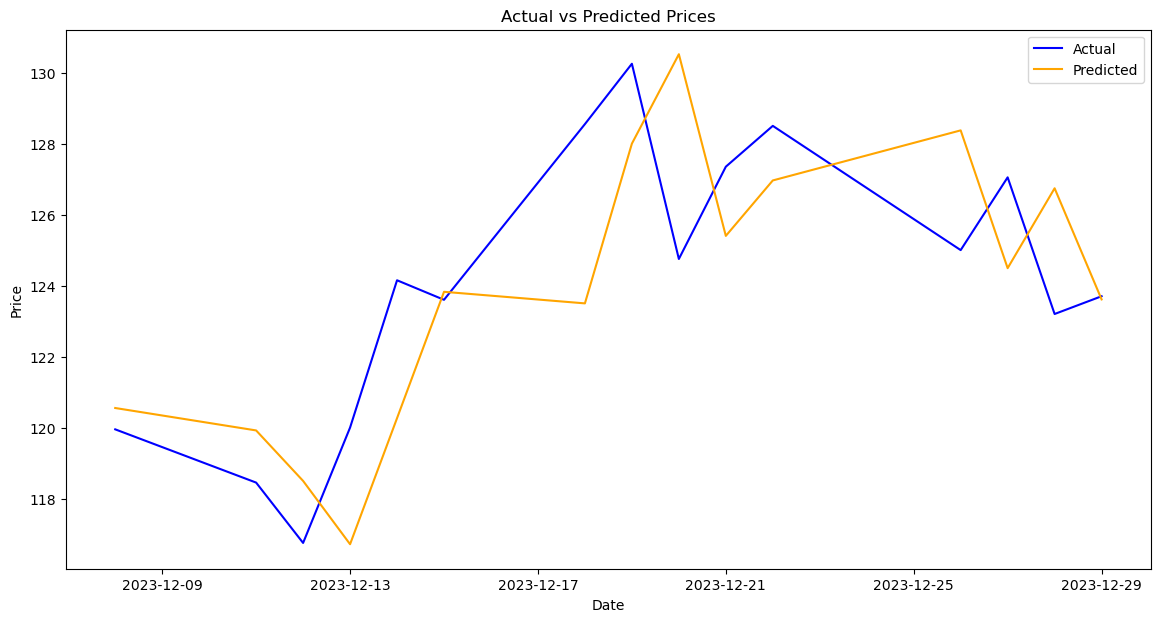

In [573]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Get actual and predicted values
actual = df['Close']
predicted = df['Predicted_ARIMA'].dropna()

# Ensure actual is a Series
if isinstance(actual, pd.DataFrame):
    actual = actual.squeeze()  # Convert to Series if it's a single-column DataFrame

# Align the data to make sure we're comparing the same time periods
# Use intersection of indices to ensure alignment
common_index = actual.index.intersection(predicted.index)

# Use .loc to index the Series
actual = actual.loc[common_index]
predicted = predicted.loc[common_index]

# Calculate various accuracy metrics
mae = mean_absolute_error(actual, predicted)
mse = mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
r2 = r2_score(actual, predicted)

# Calculate percentage accuracy using MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
accuracy = 100 - mape

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared Score: {r2:.4f}')
print(f'Model Accuracy: {accuracy:.2f}%')

# Optional: Calculate directional accuracy (how well the model predicts price movements)
actual_direction = np.sign(actual.diff().dropna())
predicted_direction = np.sign(predicted.diff().dropna())
directional_accuracy = np.mean(actual_direction == predicted_direction) * 100

print(f'Directional Accuracy: {directional_accuracy:.2f}%')

# Plotting Actual vs Predicted
plt.figure(figsize=(14, 7))
plt.plot(actual.index, actual, label='Actual', color='blue')
plt.plot(predicted.index, predicted, label='Predicted', color='orange')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()